In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_performances.csv to student_performances (1).csv


# In this tutorial you are given a task of classifying students grades bases on various properties of the students and their families. The students can have 5 kinds of grades - Excellent, Very good, Good, Satisfactory, and poor.

# You need to develop different classifiers and determine which one of them give best performaces on various metrices.

# Import Libraries.
## I have imported few new libraries for this week  but you need to import rest of them.

In [2]:

# Your code to import all the relevant libraries.

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read and display dataset.

In [3]:
# Your code to read data
df = pd.read_csv(r"e:\w9\student_performances.csv")
# Your code to print first few samples of the dataset.
df.head(5)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,poor
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,poor
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,satisfactory
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,very good
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,satisfactory


# Print the information about the dataset.

## You need to convert all the object datatypes (except output variable - grades) to the numbers using either labelencoding or one hot encoding.

In [4]:
# Your code to print the key information about the datset. Use - .info method.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

# Converting the columns  ['Fjob', 'Mjob', 'reason', 'guardian'] into one hot vectors.

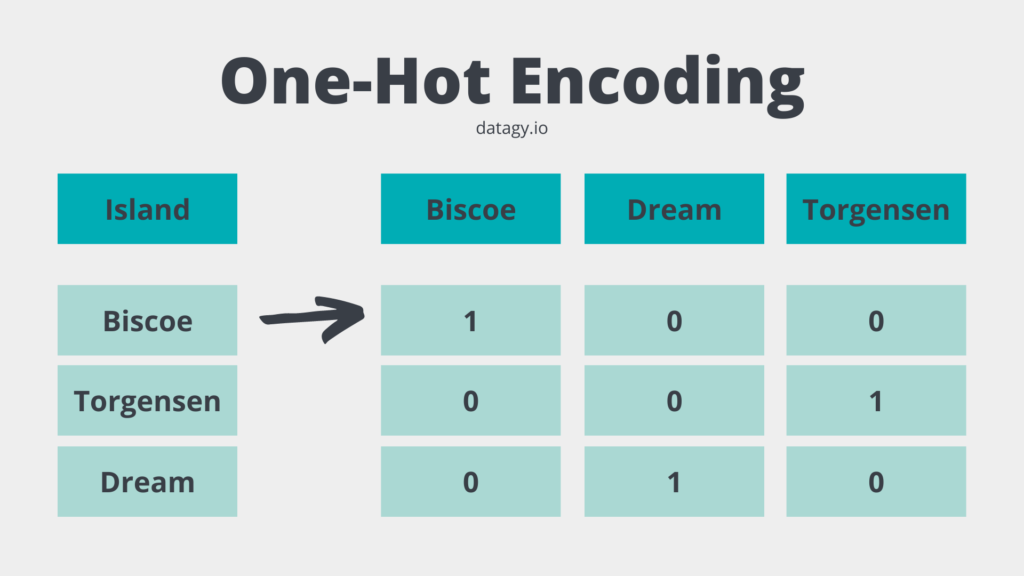

In [6]:
data = pd.get_dummies(df, columns = ['Fjob', 'Mjob', 'reason', 'guardian'])


# Note that you can also use sklearn.preprocessing.OneHotEncoder instead of pd.get_dummies.

# Next, print the first few rows of the data (dataset have been stored in data in previous cell).

In [7]:
# Your code to print first few rows of the data.
data.head(5)


,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,F,18,U,GT3,A,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,F,17,U,GT3,T,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,F,15,U,LE3,T,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,F,15,U,GT3,T,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,F,16,U,GT3,T,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


# Converting other text values in the dataframe to numbers using label encoding.

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

labelencoder.fit(data['sex'])
data ['sex'] = labelencoder.transform(data['sex'])
# Assuming 'data' is your DataFrame

# Transform 'address'
labelencoder.fit(data['address'])
data['address'] = labelencoder.transform(data['address'])

# Transform 'famsize'
labelencoder.fit(data['famsize'])
data['famsize'] = labelencoder.transform(data['famsize'])

# Transform 'Pstatus'
labelencoder.fit(data['Pstatus'])
data['Pstatus'] = labelencoder.transform(data['Pstatus'])

# Transform 'schoolsup'
labelencoder.fit(data['schoolsup'])
data['schoolsup'] = labelencoder.transform(data['schoolsup'])

# Transform 'famsup'
labelencoder.fit(data['famsup'])
data['famsup'] = labelencoder.transform(data['famsup'])

# Transform 'paid'
labelencoder.fit(data['paid'])
data['paid'] = labelencoder.transform(data['paid'])

# Transform 'activities'
labelencoder.fit(data['activities'])
data['activities'] = labelencoder.transform(data['activities'])

# Transform 'nursery'
labelencoder.fit(data['nursery'])
data['nursery'] = labelencoder.transform(data['nursery'])

# Transform 'higher'
labelencoder.fit(data['higher'])
data['higher'] = labelencoder.transform(data['higher'])

# Transform 'internet'
labelencoder.fit(data['internet'])
data['internet'] = labelencoder.transform(data['internet'])

# Transform 'romantic'
labelencoder.fit(data['romantic'])
data['romantic'] = labelencoder.transform(data['romantic'])


# Is their an efficient way to do this? Could you use loops. Try to convert it into an efficient code and replace with the above code?


# Next - Print few samples of the data to ensure everything is number except 'grades' column.

In [9]:
# Your code to print first few samples of the data.
data.head(5)

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


In [10]:
# Your code to print information on the samples of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    int32 
 1   age                395 non-null    int64 
 2   address            395 non-null    int32 
 3   famsize            395 non-null    int32 
 4   Pstatus            395 non-null    int32 
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    int32 
 11  famsup             395 non-null    int32 
 12  paid               395 non-null    int32 
 13  activities         395 non-null    int32 
 14  nursery            395 non-null    int32 
 15  higher             395 non-null    int32 
 16  internet           395 non-null    int32 
 1

# Separate input X and output y.

## X is the all columns except 'grades'.
## y is 'grades' column.

In [11]:
# Your code to get X from data
# Your code to get y from data
X = data.drop(columns=["grades"])
y = data["grades"]

# Print shapes of X and y to make sure everything is good

In [12]:
# Print shape of X
# Print shape of y
# Print X
# Print y

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (395, 42)
Shape of y: (395,)


# Next  - Split data into train and test set.

In [13]:
# Your code to split data into train and test set.


#
#
# Print shapes of train and test data to make sure everyhing is in order.
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (316, 42)
Shape of y_train: (316,)
Shape of X_test: (79, 42)
Shape of y_test: (79,)


# Next - Develop a SVM classifier and fit into the train dataset.

In [14]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

# Next - prdict the values on the input test set.

# Find accuracy, precision, recall, f-score.

In [15]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))

Accuracy test set:  0.25316455696202533
None
Precision test set:  0.25316455696202533
None
Recall test set:  0.25316455696202533
None
F-score test set:  0.25316455696202533
None
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00        10
        good       0.00      0.00      0.00        10
        poor       0.32      0.56      0.41        27
satisfactory       0.16      0.31      0.21        16
   very good       0.00      0.00      0.00        16

    accuracy                           0.25        79
   macro avg       0.10      0.17      0.12        79
weighted avg       0.14      0.25      0.18        79



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Find accuracy, precision, recall, and f-score on training dataset.

In [16]:
train_data_predictions = classifier.predict(X_train)

print (print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions)))
print (print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' )))

print (classification_report(y_train, train_data_predictions))

Accuracy train set:  0.37341772151898733
None
Precision train set:  0.37341772151898733
None
Recall train set:  0.37341772151898733
None
F-score train set:  0.37341772151898733
None
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00        30
        good       0.00      0.00      0.00        52
        poor       0.40      0.76      0.52       103
satisfactory       0.34      0.46      0.39        87
   very good       0.00      0.00      0.00        44

    accuracy                           0.37       316
   macro avg       0.15      0.24      0.18       316
weighted avg       0.22      0.37      0.28       316



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Display confusion matrix between actual and predicted values on the test data.

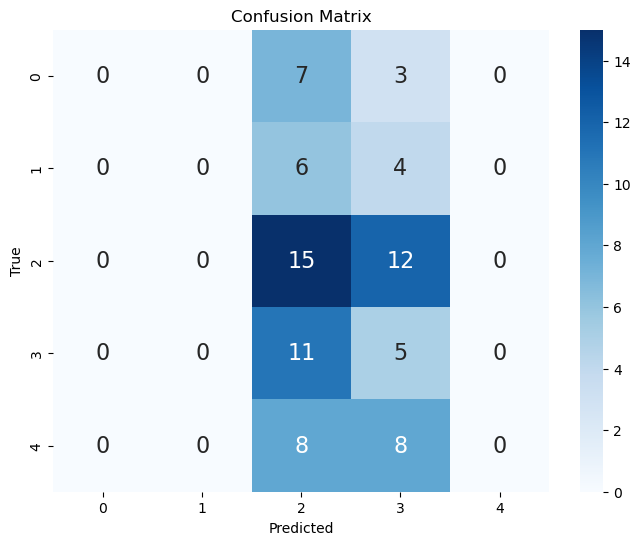

In [17]:
#
# Your code to display confusion matrix between predicted output and actual output
#
#
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Earlier, we used rfb Kernel. Now, we will test other kernels too.

# We will test on ['linear', 'poly', 'rbf', 'sigmoid' ] kernels.

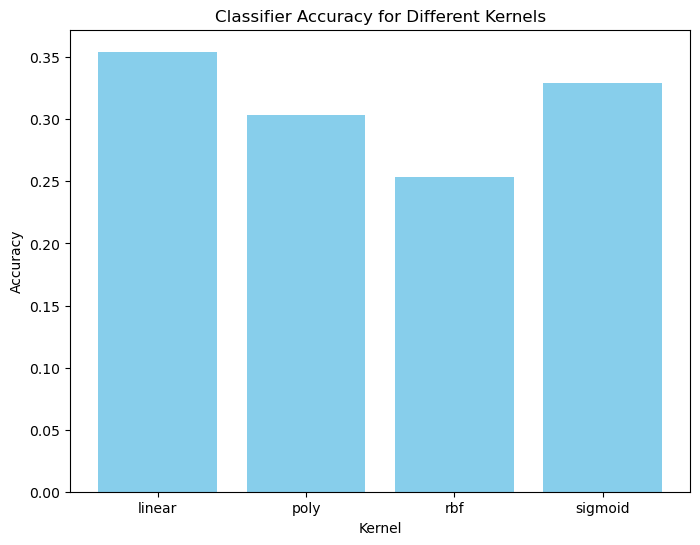

In [18]:
# Create a list of kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create an empty list for accuracy
accuracy = []

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing data
for kernel in kernels:
    # Create a SVM classifier with the specified kernel
    svm_classifier = SVC(kernel=kernel)
    
    # Fit the classifier on training data
    svm_classifier.fit(X_train, y_train)
    
    # Make predictions on test data
    y_pred = svm_classifier.predict(X_test)
    
    # Calculate accuracy and append to the list
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

# Plot accuracy versus kernels
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracy, color='skyblue')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy for Different Kernels')
plt.show()

# Which Kernel function is giving you best accuracy?

# Next - Develop KNN and Losgistic regression classifiers for this dataset.

In [19]:
#
# Develop KNN-based classifier. Use number of neigbours of your choice
#
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN Classifier:", accuracy)


Accuracy of KNN Classifier: 0.2911392405063291


# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on test data.

In [27]:

y_pred = knn_classifier.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred)

print("Classification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

Classification Report:
               precision    recall  f1-score   support

   excellent       0.43      0.30      0.35        10
        good       0.11      0.20      0.14        10
        poor       0.50      0.41      0.45        27
satisfactory       0.12      0.12      0.12        16
   very good       0.33      0.31      0.32        16

    accuracy                           0.29        79
   macro avg       0.30      0.27      0.28        79
weighted avg       0.33      0.29      0.31        79


Confusion Matrix:
 [[ 3  4  0  2  1]
 [ 0  2  2  5  1]
 [ 1  6 11  3  6]
 [ 2  3  7  2  2]
 [ 1  3  2  5  5]]


# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on train data.



In [21]:
y_train_pred = knn_classifier.predict(X_train)

# Evaluate the classifier on training data
classification_rep_train = classification_report(y_train, y_train_pred)
confusion_mat_train = confusion_matrix(y_train, y_train_pred)

# Print the classification report and confusion matrix for training data
print("Classification Report (Training Data):\n", classification_rep_train)
print("\nConfusion Matrix (Training Data):\n", confusion_mat_train)

Classification Report (Training Data):
               precision    recall  f1-score   support

   excellent       0.34      0.33      0.34        30
        good       0.46      0.48      0.47        52
        poor       0.63      0.69      0.66       103
satisfactory       0.50      0.52      0.51        87
   very good       0.39      0.27      0.32        44

    accuracy                           0.52       316
   macro avg       0.47      0.46      0.46       316
weighted avg       0.51      0.52      0.51       316


Confusion Matrix (Training Data):
 [[10  1  7  7  5]
 [ 5 25  9  9  4]
 [ 4  9 71 14  5]
 [ 4 11 22 45  5]
 [ 6  8  3 15 12]]


# Display confusion matric between predicted and actual values.

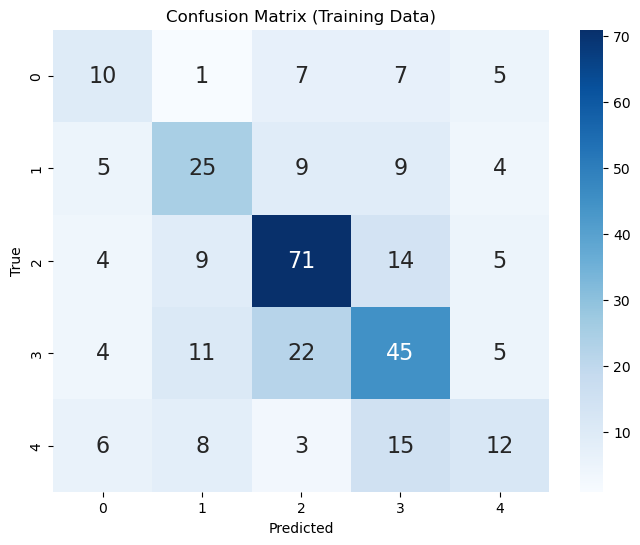

In [23]:
confusion_mat_train = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_train, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Training Data)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Develop Logistic Regression-based classifier.

# Evaluate Logistic Regression for accuracy, precision, recall, f-score, and classification report on test data.

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier = LogisticRegression(random_state=42)

logistic_regression_classifier.fit(X_train, y_train)
y_train_pred = logistic_regression_classifier.predict(X_train)
y_test_pred = logistic_regression_classifier.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)
confusion_mat_train = confusion_matrix(y_train, y_train_pred)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluate Logistic regression for accuracy, precision, recall, f-score, and classification report on train data.

In [25]:
# Print metrics for training data
print("Accuracy (Training Data):", accuracy_train)
print("Classification Report (Training Data):\n", classification_rep_train)
print("Confusion Matrix (Training Data):\n", confusion_mat_train)

Accuracy (Training Data): 0.509493670886076
Classification Report (Training Data):
               precision    recall  f1-score   support

   excellent       0.75      0.40      0.52        30
        good       0.42      0.27      0.33        52
        poor       0.57      0.70      0.63       103
satisfactory       0.44      0.46      0.45        87
   very good       0.45      0.52      0.48        44

    accuracy                           0.51       316
   macro avg       0.53      0.47      0.48       316
weighted avg       0.51      0.51      0.50       316

Confusion Matrix (Training Data):
 [[12  4  5  5  4]
 [ 1 14 15 14  8]
 [ 0  3 72 23  5]
 [ 1  7 28 40 11]
 [ 2  5  6  8 23]]


# Display confusion matrix between predicted and actual values for logistic regression.

In [26]:
print("Confusion Matrix (Training Data):\n", confusion_mat_train)

Confusion Matrix (Training Data):
 [[12  4  5  5  4]
 [ 1 14 15 14  8]
 [ 0  3 72 23  5]
 [ 1  7 28 40 11]
 [ 2  5  6  8 23]]


Next, compare the accuracy, precision, recall, and F-score for all the classifiers using plots. You need to have only one plot rather than 4 different plots for 4 different meteruces.

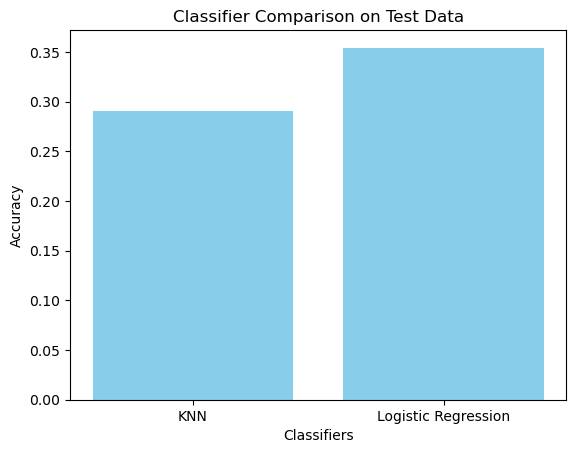

In [29]:
#
#
# Your code to plot and compare the performance of different algorithms
classifiers = ['KNN', 'Logistic Regression']  # Add other classifier names as needed
accuracies = [accuracy_knn, accuracy_logistic]  # Add other classifier accuracies as needed

plt.bar(classifiers, accuracies, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison on Test Data')
plt.show()


### **Important - Document in your Lab Logbook**

# 1.   Include a plot comparing the performance of various algorithms.
# 2.    Specify the best-performing algorithm and indicate which category exhibits the best and least performance based on the confusion metrics.

